# A glimpse into TA...

### Let's check out what our data looks like

In [3]:
import pandas
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import math
import random
from bs4 import BeautifulSoup

In [51]:
pandas.set_option("display.max_colwidth", 50)
posts = None
posts = pandas.read_csv('../data/posts_v2_2.csv', names=['post_id', 'post_title', 'num_comments', 'post_content', 'post_url'])
posts.head()

,post_id,post_title,num_comments,post_content,post_url
0,10p0glu,AITA for saying my mother is insensitive for c...,1054,"I’m 21F, recently welcomed my own child into t...",https://www.reddit.com/r/AmItheAsshole/comment...
1,10p55w6,AITA for having my adult daughter pay half of ...,495,I [52F] am having my adult daughter [25F] pay ...,https://www.reddit.com/r/AmItheAsshole/comment...
2,10pgsmn,AITA for having an 18+ house?,472,My (32f) and my husband (30m) are childfree by...,https://www.reddit.com/r/AmItheAsshole/comment...
3,10ovk6p,AITA for refusing to take a DNA test to confir...,1366,So my (27M) fiancé (26F) is adopted. She was a...,https://www.reddit.com/r/AmItheAsshole/comment...
4,10p9z0a,AITA for telling my soon to be SIL that I didn...,109,My brother is getting married in May. My broth...,https://www.reddit.com/r/AmItheAsshole/comment...


In [52]:
comments = None
comments = pandas.read_csv('../data/comments_v2_2.csv', names=['post_id', 'comment_id', 'comment_score', 'comment_content', 'comment_permalink'])
comments.head()

,post_id,comment_id,comment_score,comment_content,comment_permalink
0,t3_10p0glu,j6hpif3,9787,YTA &gt;I know it wasn’t her job to forgive h...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
1,t3_10p0glu,j6hpzqy,3137,"YTA. Your father abused her. Also, who are you...",/r/AmItheAsshole/comments/10p0glu/aita_for_say...
2,t3_10p0glu,j6hpkvv,1972,YTA. Your dad was abusive to your mother. Of...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
3,t3_10p0glu,j6hqzyp,1295,Yta so you acknowledge that your dad was abusi...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
4,t3_10p0glu,j6hploi,585,YTA Your dad sounded like an AH. It's unders...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...


In [60]:
posts.drop_duplicates(keep = 'first', inplace=True)
post_row_count = posts.shape[0] # returns nb of lines

comments.drop_duplicates(keep = 'first', inplace=True)
comment_row_count = comments.shape[0] # returns nb of lines
print("","unique post number:", post_row_count,"\n", "unique comment number:", comment_row_count,"\n", "average comment per post:", comment_row_count / post_row_count) 


 unique post number: 3144 
 unique comment number: 66903 
 average comment per post: 21.279580152671755


Lots of duplicates shows my pagination loop probably needs some fixing up

In [10]:
most_answered_post = max(posts['num_comments'])
best_rated_comment = max(comments['comment_score'])
least_answered_post = min(posts['num_comments'])
worst_rated_comment = min(comments['comment_score'])

print("Range of number of answers on a post =", "[" + str(least_answered_post) + " , " + str(most_answered_post) +"]")
print("Range of comment scores =", "[" + str(worst_rated_comment) + " , " + str(best_rated_comment) +"]")


Range of number of answers on a post = [1 , 7168]
Range of comment scores = [-126 , 55462]


Let's try and get some statistical data on posts & comments to get a sense of our dataset quality

Text(330, 0.001, 'PDF curve')

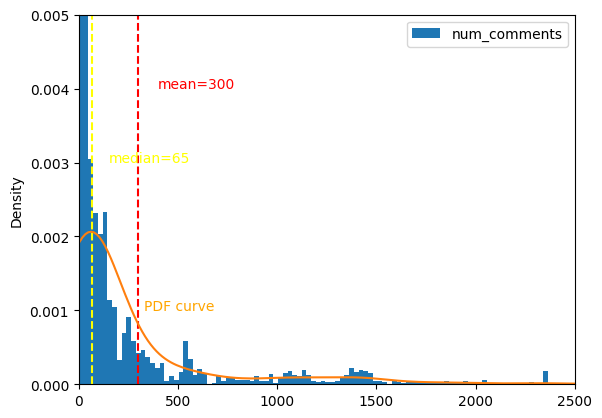

In [11]:
posts.plot.hist(column="num_comments", bins = 300, density = True, xlim=[0, 2500], ylim = [0, 0.005])

mean = posts["num_comments"].mean()
plt.axvline(mean, color='red', linestyle='dashed')
plt.text(400, .004,'mean=' + str(round(mean)), color='red')

median = posts["num_comments"].median()
plt.axvline(median, color='yellow', linestyle='dashed')
plt.text(150, .003, 'median=' + str(round(median)), color='yellow')

# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable
posts["num_comments"].plot.kde()
plt.text(330, .001, 'PDF curve', color='orange')



Text(150, 0.003, 'median=17')

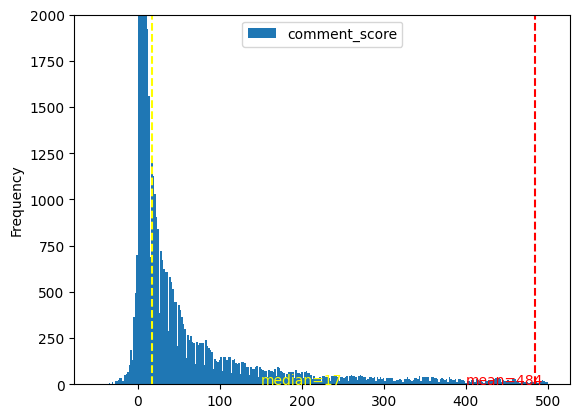

In [12]:
comments.plot.hist(column="comment_score", bins = 300, range=[-50, 500], ylim = [0, 2000])
mean = comments["comment_score"].mean()
plt.axvline(mean, color='red', linestyle='dashed')
plt.text(400, .004,'mean=' + str(round(mean)), color='red')
median = comments["comment_score"].median()
plt.axvline(median, color='yellow', linestyle='dashed')
plt.text(150, .003, 'median=' + str(round(median)), color='yellow')


High mean of comment score may be explained because of very high max values(55462) and good quality comments since they were sorted by top comments

### Let's try and clean up our data

#### Posts

In [13]:
pandas.set_option("display.max_colwidth", 50)
posts = pandas.read_csv('../data/posts_v2_2.csv', names=['post_id', 'post_title', 'num_comments', 'post_content', 'post_url'])
posts.head()

,post_id,post_title,num_comments,post_content,post_url
0,10p0glu,AITA for saying my mother is insensitive for c...,1054,"I’m 21F, recently welcomed my own child into t...",https://www.reddit.com/r/AmItheAsshole/comment...
1,10p55w6,AITA for having my adult daughter pay half of ...,495,I [52F] am having my adult daughter [25F] pay ...,https://www.reddit.com/r/AmItheAsshole/comment...
2,10pgsmn,AITA for having an 18+ house?,472,My (32f) and my husband (30m) are childfree by...,https://www.reddit.com/r/AmItheAsshole/comment...
3,10ovk6p,AITA for refusing to take a DNA test to confir...,1366,So my (27M) fiancé (26F) is adopted. She was a...,https://www.reddit.com/r/AmItheAsshole/comment...
4,10p9z0a,AITA for telling my soon to be SIL that I didn...,109,My brother is getting married in May. My broth...,https://www.reddit.com/r/AmItheAsshole/comment...


Handling quotes and \

In [53]:
for content in posts['post_content']:
    initial_string = content
    output_string ="""{0}"""
    content = output_string

Control Check

In [54]:
pandas.set_option("display.max_colwidth", 500)
print(posts['post_content'][random.randrange(0,100)])

I (35f) I lost my father very early when I was 5 years old. A few months after his death, my mother married a guy named "John". John already had two teenage boys and he didn't want to raise me because he never wanted to be a girl's father. My mother, like a good mother, abandoned me with my aunt and took my brother (8 by the time) with her to live with her husband. John was a man with a lot of money and he always spoiled my mother and brother, but he never bothered to get me even a Christmas present. My mother didn't do anything for me either, she came to visit me once a month and didn't even call me at Christmas or New Year (I always called, but many times she didn't answer). My aunt was a woman who couldn't have children, because of that she and my uncle raised me as if I were their daughter, not missing anything for me. Even without much money I accumulated some money from my job I had during high school and I earned a small amount from my aunt which was enough for me to pay for my 

#### Comments

In [28]:
pandas.set_option("display.max_colwidth", 50)
comments = pandas.read_csv('../data/comments_v2_2.csv', names=['post_id', 'comment_id', 'comment_score', 'comment_content', 'comment_permalink'])
comments.head()

,post_id,comment_id,comment_score,comment_content,comment_permalink
0,t3_10p0glu,j6hpif3,9787,YTA &gt;I know it wasn’t her job to forgive h...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
1,t3_10p0glu,j6hpzqy,3137,"YTA. Your father abused her. Also, who are you...",/r/AmItheAsshole/comments/10p0glu/aita_for_say...
2,t3_10p0glu,j6hpkvv,1972,YTA. Your dad was abusive to your mother. Of...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
3,t3_10p0glu,j6hqzyp,1295,Yta so you acknowledge that your dad was abusi...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...
4,t3_10p0glu,j6hploi,585,YTA Your dad sounded like an AH. It's unders...,/r/AmItheAsshole/comments/10p0glu/aita_for_say...


Handling html tags & id format

In [56]:
%%time
for content in comments['comment_content']:
    clean_content = BeautifulSoup(content, "html.parser").text
    content = clean_content

CPU times: user 34.6 s, sys: 49.7 ms, total: 34.6 s
Wall time: 34.7 s


In [57]:
comments['post_id'] = comments['post_id'].str[3:]

Control Check

In [49]:
pandas.set_option("display.max_colwidth", 500)
rand = random.randrange(0,100)
print(comments['comment_content'][rand])
print(BeautifulSoup(comments['comment_content'][rand], "html.parser").text)

YTA and your daughter will probably go lc once she moves out.   Info are you a hoarder? It would take a pretty drastic level of mess to be embarrassed. If she can't bring people to the apartment then I see no reason for her to pay half. Utilities and food, sure but not rent when she's probably crammed into a single room to sleep.
YTA and your daughter will probably go lc once she moves out.   Info are you a hoarder? It would take a pretty drastic level of mess to be embarrassed. If she can't bring people to the apartment then I see no reason for her to pay half. Utilities and food, sure but not rent when she's probably crammed into a single room to sleep.


In [58]:
rand = random.randrange(0,100)
print(comments['post_id'][rand])

10p55w6


### Let's try and join our comments to our posts

In [72]:
df = None

print("Joining", posts['post_id'].count(), "posts", 'to' , comments['comment_id'].count(), "comments")

df = posts.merge(comments, left_on='post_id', right_on='post_id', how='left')
df_light = df.drop(['comment_permalink', 'num_comments', 'post_url'], axis=1)  # axis 1 = column

print(df_light)

Joining 3144 posts to 66903 comments
        post_id  \
0       10p0glu   
1       10p0glu   
2       10p0glu   
3       10p0glu   
4       10p0glu   
...         ...   
636316  10p0etv   
636317  10p0etv   
636318  10p0etv   
636319  10p0etv   
636320  10p0etv   

                                                                                post_title  \
0       AITA for saying my mother is insensitive for calling her new partner her soulmate?   
1       AITA for saying my mother is insensitive for calling her new partner her soulmate?   
2       AITA for saying my mother is insensitive for calling her new partner her soulmate?   
3       AITA for saying my mother is insensitive for calling her new partner her soulmate?   
4       AITA for saying my mother is insensitive for calling her new partner her soulmate?   
...                                                                                    ...   
636316                                                       AITA for taking